In [ ]:
#Import pyspark Library, pandas
#Create Spark Variable
#Read Data
#Analyze Data printSchema, Show
#Transfromations if required- Data Casting, filtering

#ML 
#EDA
#Descriptive Data Analytics
#Correlation using scatte rplot

#Transfrom the data for the Spark Vector Assembler - scaling (in pandas we have - StandardScaler, MinMax Scaler)
#Divide the data in train and test
#Run regression algorithm
#fit model Training Set
#Calculate Metrics


In [1]:
from pyspark.sql import SparkSession, functions as func

In [2]:
spark =  SparkSession.builder.appName("Demo Spark ML").getOrCreate()

In [3]:
spark

In [37]:
#Boston Housing Data
housing_df = spark.read.format("csv").options(header= True, inferSchema = True).load("HousingData.csv")


In [39]:
housing_df = housing_df.withColumn("CRIM", func.col("CRIM").cast("double")).withColumn("ZN", func.col("ZN").cast("double"))
housing_df =housing_df.withColumn("INDUS", func.col("INDUS").cast("double"))
housing_df =housing_df.withColumn("CHAS", func.col("CHAS").cast("double"))
housing_df =housing_df.withColumn("AGE", func.col("AGE").cast("double"))
housing_df =housing_df.withColumn("LSTAT", func.col("LSTAT").cast("double"))
housing_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: double (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PTRATIO: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MEDV: double (nullable = true)



In [31]:
housing_df.show(3)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   CRIM|  ZN|INDUS|CHAS|  NOX|   RM| AGE|   DIS|RAD|TAX|PTRATIO|     B|LSTAT|MEDV|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31| 0.0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07| 0.0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07| 0.0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 3 rows



In [32]:
import pandas as pd
housing_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,486,3.6118739711934156,8.7201918501516,0.00632,88.9762
ZN,486,11.2119341563786,23.388876146265478,0.0,100.0
INDUS,486,11.083991769547332,6.835896498641436,0.46,27.74
CHAS,486,0.06995884773662552,0.255340480906568,0.0,1.0
NOX,506,0.5546950592885372,0.11587767566755584,0.385,0.871
RM,506,6.284634387351787,0.7026171434153232,3.561,8.78
AGE,486,68.51851851851852,27.999513005092354,2.9,100.0
DIS,506,3.795042687747034,2.10571012662761,1.1296,12.1265
RAD,506,9.549407114624506,8.707259384239366,1,24


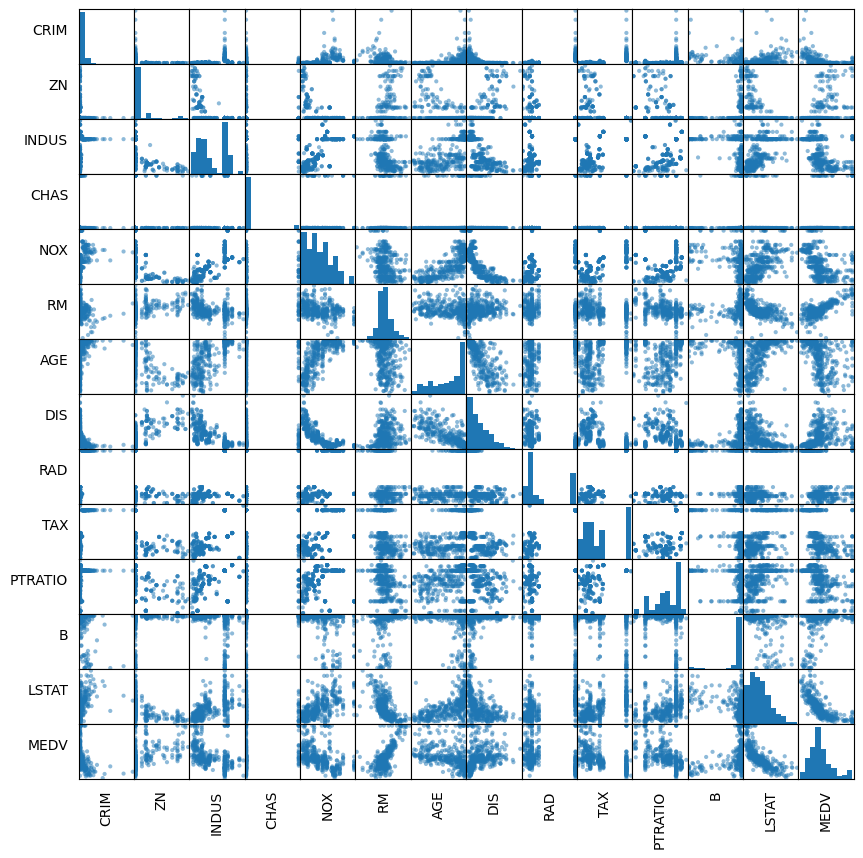

In [33]:
import pandas as pd
from pandas.plotting import scatter_matrix
numeric_features = [t[0] for t in housing_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = housing_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [18]:
import six
for i in housing_df.columns:
     if not(isinstance(housing_df.select(i).take(1)[0][0], six.string_types)):
            print("Corr with target", i, housing_df.corr("MEDV", i))

Corr with target CRIM -0.38412049951932825
Corr with target ZN 0.36229247162187805
Corr with target INDUS -0.44137144862816985
Corr with target CHAS 0.18384443942540873
Corr with target NOX -0.4273207723732821
Corr with target RM 0.6953599470715401
Corr with target AGE -0.3566992455635852
Corr with target DIS 0.249928734085904
Corr with target RAD -0.38162623063977735
Corr with target TAX -0.46853593356776674
Corr with target PTRATIO -0.5077866855375622
Corr with target B 0.3334608196570661
Corr with target LSTAT -0.6954050666730762
Corr with target MEDV 1.0


In [16]:
housing_df.select("CRIM").take(1)

[Row(CRIM=0.00632)]

In [21]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.setHandleInvalid("skip").transform(housing_df)
vhouse_df = vhouse_df.select(['features', 'MEDV'])
vhouse_df.show(3, truncate=False)

+-------------------------------------------------------------------------+----+
|features                                                                 |MEDV|
+-------------------------------------------------------------------------+----+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]  |24.0|
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14] |21.6|
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]|34.7|
+-------------------------------------------------------------------------+----+
only showing top 3 rows



In [25]:
splits = vhouse_df.randomSplit([0.7, 0.3])
print(splits)
train_df = splits[0]
test_df = splits[1]


[DataFrame[features: vector, MEDV: double], DataFrame[features: vector, MEDV: double]]


In [26]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MEDV', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.05979749634339741,0.02516379556983388,0.0,3.0144024629573227,-8.880806190086876,4.479964277922056,-0.005457398628821025,-0.7895497575039131,0.0,0.0,-0.8212901212160251,0.005501475307128866,-0.4552812374981332]
Intercept: 21.50925584071142


In [27]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.985559
r2: 0.716547


In [28]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MEDV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MEDV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|MEDV|            features|
+------------------+----+--------------------+
|28.262456028726945|22.0|[0.01096,55.0,2.2...|
|30.970797398010326|35.4|[0.01311,90.0,1.2...|
|18.209738535003805|18.9|[0.0136,75.0,4.0,...|
| 28.09446638459714|24.5|[0.01501,80.0,2.0...|
| 32.29201888669895|32.9|[0.01778,95.0,1.4...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.824022
